Nolearn Tutorial (toy example)
====
본 튜토리얼은 [다음 lasagne 예제](https://github.com/craffel/Lasagne-tutorial/blob/master/examples/tutorial.ipynb) 문서와 [다음 nolearn 예제](http://nbviewer.ipython.org/github/dnouri/nolearn/blob/master/docs/notebooks/CNN_tutorial.ipynb)를 기반으로 작성되었으며, 최신(2015년 09월 04일)의 master branch에서 동작하도록 수정되었음.
(내용이해를 돕기위해 간략하게 번역 및 각색하여 오역이나 오류가 있을 수 있음.)

## Toy example
* 다음은 2차원의 3개 군집을 갖는 점들을 구분하는 standard multi-layer perceptron을 학습하는 예제이다.

### 예제 데이터 생성
* 2차원의 3개의 군집을 갖는 데이터를 생성한다.

In [1]:
import theano
import sklearn.datasets
# Generate synthetic data
N_CLASSES = 3
X, y = sklearn.datasets.make_classification(n_features=2, n_redundant=0,
                                            n_classes=N_CLASSES, n_clusters_per_class=1)
# Convert to theano floatX
X = X.astype(theano.config.floatX)
# Labels should be ints
y = y.astype('int32')

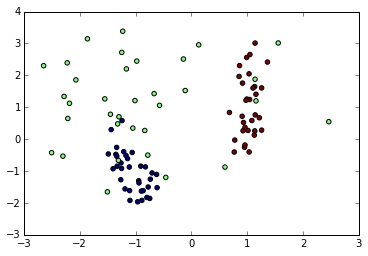

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
# Make a scatter plot where color encodes class
plt.scatter(X[:, 0], X[:, 1], c=y)

### layers
lasagne는 일반적으로 Layer인스턴스를 쌓아서 네트워크를 만든다. lasagne의 Layer는 neural network에서 일반적으로 사용되는 기능을을 구현해 놓았고, layer에 있는 파라메터는 Theano를 사용해 계산한다.

#### InputLayer
InputLayer는 실제 입력 데이터(observed data)를 넣을 수 있는 레이어이다.

#### DenseLayer
DenseLayers는 neural network의 기본 형태의 Layer이다.
인풋값인 $x$ 에 웨이트 매트릭스 $W$ 와 바이어스 벡터 $b$ 를 연산하고 nonlinearity 함수인 $\\sigma$ 를 수행한다. ($\\sigma(Wx + b)$)
> fullconnect layer라고도 한다.


In [3]:
from lasagne.layers import *
from lasagne.nonlinearities import *
layers = [
    (InputLayer, {'shape': X.shape}),
    (DenseLayer, {'num_units': 10, 'nonlinearity': tanh} ),
    (DenseLayer, {'num_units': N_CLASSES, 'nonlinearity': softmax} ),
]

### NeuralNet
#### training

In [4]:
from nolearn.lasagne import NeuralNet
from lasagne.objectives import *
from lasagne.updates import *

net = NeuralNet(
    layers=layers,
    max_epochs = 10,
    
    update=sgd,
    update_learning_rate=1,
    
    verbose=1,
)

In [5]:
_ = net.fit(X, y)

# Neural Network with 63 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input0       2
  1  dense1      10
  2  dense2       3

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       0.79278       0.61179      1.29583      0.85714  0.00s
      2       0.56361       0.55556      1.01450      0.80952  0.00s
      3       0.48090       0.53676      0.89594      0.80952  0.00s
      4       0.43813       0.53195      0.82363      0.80952  0.00s
      5       0.41399       0.53231      0.77771      0.80952  0.00s
      6       0.39930       0.53486      0.74655      0.80952  0.00s
      7       0.38963       0.53834      0.72376      0.80952  0.00s
      8       0.38280       0.54214      0.70610      0.80952  0.00s
      9       0.37769       0.54594      0.69182      0.80952  0.00s
     10       0.37368       0.54960      0.67991      0.80952  0.00s


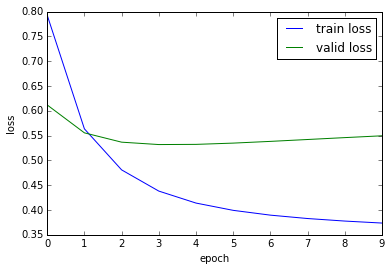

In [6]:
from nolearn.lasagne.visualize import plot_loss
plot_loss(net)

#### evaluation


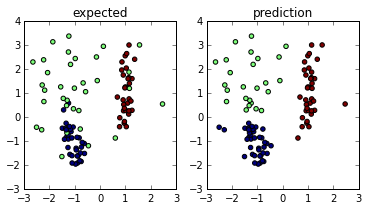

In [7]:
y_hat = net.predict(X)

figs, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[0].set_title("expected")
axes[1].scatter(X[:, 0], X[:, 1], c=y_hat)
axes[1].set_title("prediction")


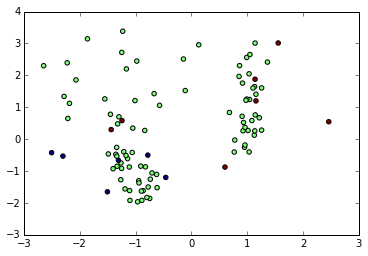

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_hat-y)